<a href="https://colab.research.google.com/github/ValerioJiang/EU_Green_Deal_2005_2022/blob/main/EU_Renewable_Energy_Report_2005_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Goals of this project:
- Esporre situazione attuale, facendo vedere un overview generale dei vari paesi e come sono variate nel tempo?
NOTA TECNICA(Barplot attuale orizzontale che si legga bene le label senza girare la testa, idea per una classifica da 2005-2022 con variazione in stile serie a)

- Fun facts(es. come mai islanda ha una percentuale così alta che cosa implica? citare Energia basso costo per mining bitcoin, perche il lussemburgo così basso)

- Com'è la composizione energetica delle fonti rinnovabili, quali sono quelle quelle più utilizzate e come si sono evolute nel tempo?

- Panoramica situazione italiana


- Quali sono i target che la UE ha imposto e quali paesi hanno più probabilità o hanno già raggiunto tali target?
(Valutare se regressione lineare ci può essere utile(Non ci sono correlazioni tra Anno e e Valore), trovare strumenti per predirre in base a solo ai risultati quali sono i possibili valori che raggiungono, anche se non utile lato business, utile per capire lato tecnico come impostare per soluzioni similari)
https://shorturl.at/fi7Wk


#ITA
L’ obiettivo dell’UE è di diventare il primo continente climaticamente neutro entro il 2050, descritto in
modo più
approfondito nell’“European Green Deal”, il più ambizioso pacchetto di misure che dovrebbe abilitare i
cittadini e le imprese europee a beneficiare della transizione sostenibile verde.
L’uso di energia rinnovabile può portare innumerevoli benefici, come per esempio:
* Riduzione delle emissioni di gas serra;
* Maggiore diversificazione nella scelta di forniture energetiche;
* Riduzione della dipendenza da fonti fossili (in particolare petrolio e gas);

Inoltre, la crescita delle fonti rinnovabili può stimolare il mercato del lavoro nella UE, tramite la
creazione di nuovi lavori nelle cosiddette “New Green Technologies”.
I dati raccolti rappresentano la fetta di percentuale di consumi energetici dei paesi UE28 provenienti da
fonti rinnovabili, tra i quali figurano:
* Energia eolica;
* Energia solare (termica, fotovoltaica e concentrata);
* Energia idroelettrica;
* Energia mareomotrice;
* Energia geotermica;
* Calore ambientale catturato da pompe di calore;
* Biocombustibili;
* Parte rinnovabile dei rifiuti;


#EN

The EU's goal is to become the first climate-neutral continent by 2050, described in
way more
explored in depth in the “European Green Deal”, the most ambitious package of measures that should enable i
European citizens and businesses to benefit from the sustainable green transition.
The use of renewable energy can bring countless benefits, such as:
* Reduction of greenhouse gas emissions;
* Greater diversification in the choice of energy supplies;
* Reduction of dependence on fossil fuels (in particular oil and gas);

Furthermore, the growth of renewable sources can stimulate the labor market in the EU, through
creation of new jobs in the so-called “New Green Technologies”.
The data collected represents the percentage slice of energy consumption of the EU28 countries coming from
renewable sources, including:
* Wind energy;
* Solar energy (thermal, photovoltaic and concentrated);
* Hydroelectric energy;
* Tidal energy;
* Geothermal energy;
* Ambient heat captured by heat pumps;
* Biofuels;
* Renewable part of waste;


Data used accessible here https://ec.europa.eu/eurostat/databrowser/view/nrg_ind_ren/default/line?lang=en


The result indicator is expressed as the percentage. Basic data on energy quantities are in fuel specific units and for the purpose of calculation converted to common energy units (e.g. ktoe). Basic data are available in the SHARES section of the website.

#Situazione attuale

I dati presentati rappresentano la percentuale della produzione di energia derivata da fonti rinnovabili in rapporto al totale

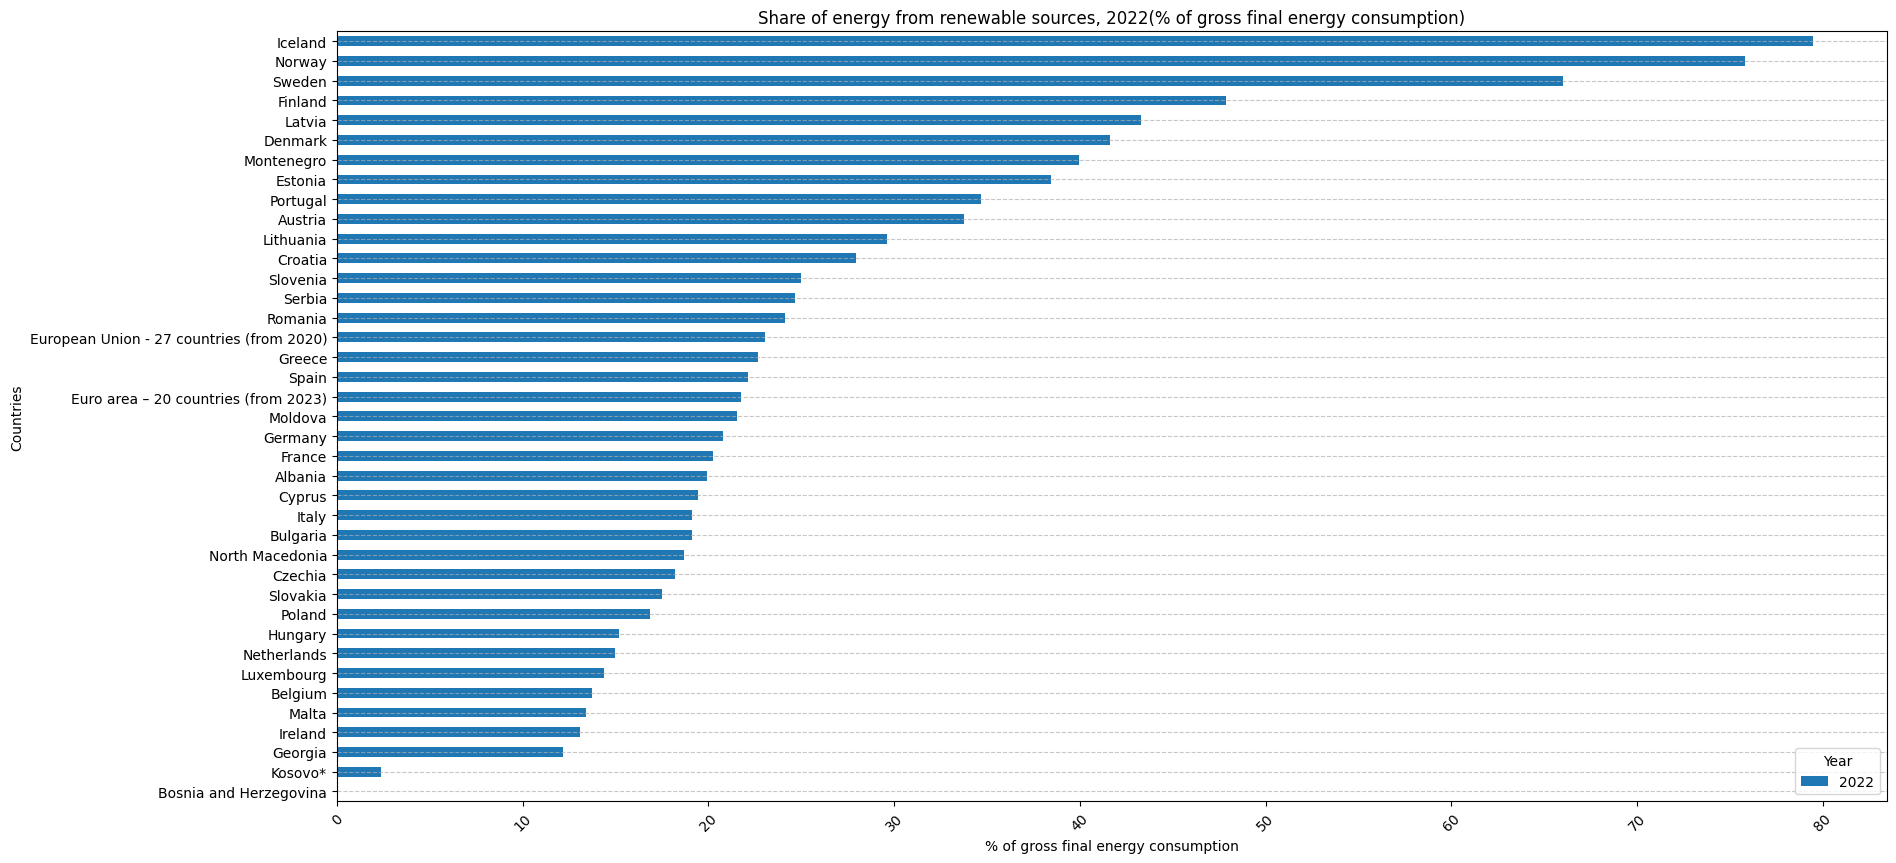

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = '/content/eu_renewable_energy_2005_2022.csv'
eu_energy_df = pd.read_csv(csv_file)

#setting index by country
eu_energy_df = eu_energy_df.replace(':', 0, regex = True)
countries = eu_energy_df['country_name'].tolist()

data_dict = {}
data_dict['2022'] = eu_energy_df['2022'].astype(float).tolist()


eu_energy_df = pd.DataFrame(data_dict, index=countries)

eu_energy_df = eu_energy_df.sort_values(by='2022', ascending=True)

# Create the bar plot

eu_energy_df.plot.barh(figsize=(20, 10))
plt.title('Share of energy from renewable sources, 2022(% of gross final energy consumption)')
plt.ylabel('Countries')
plt.xlabel('% of gross final energy consumption')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()



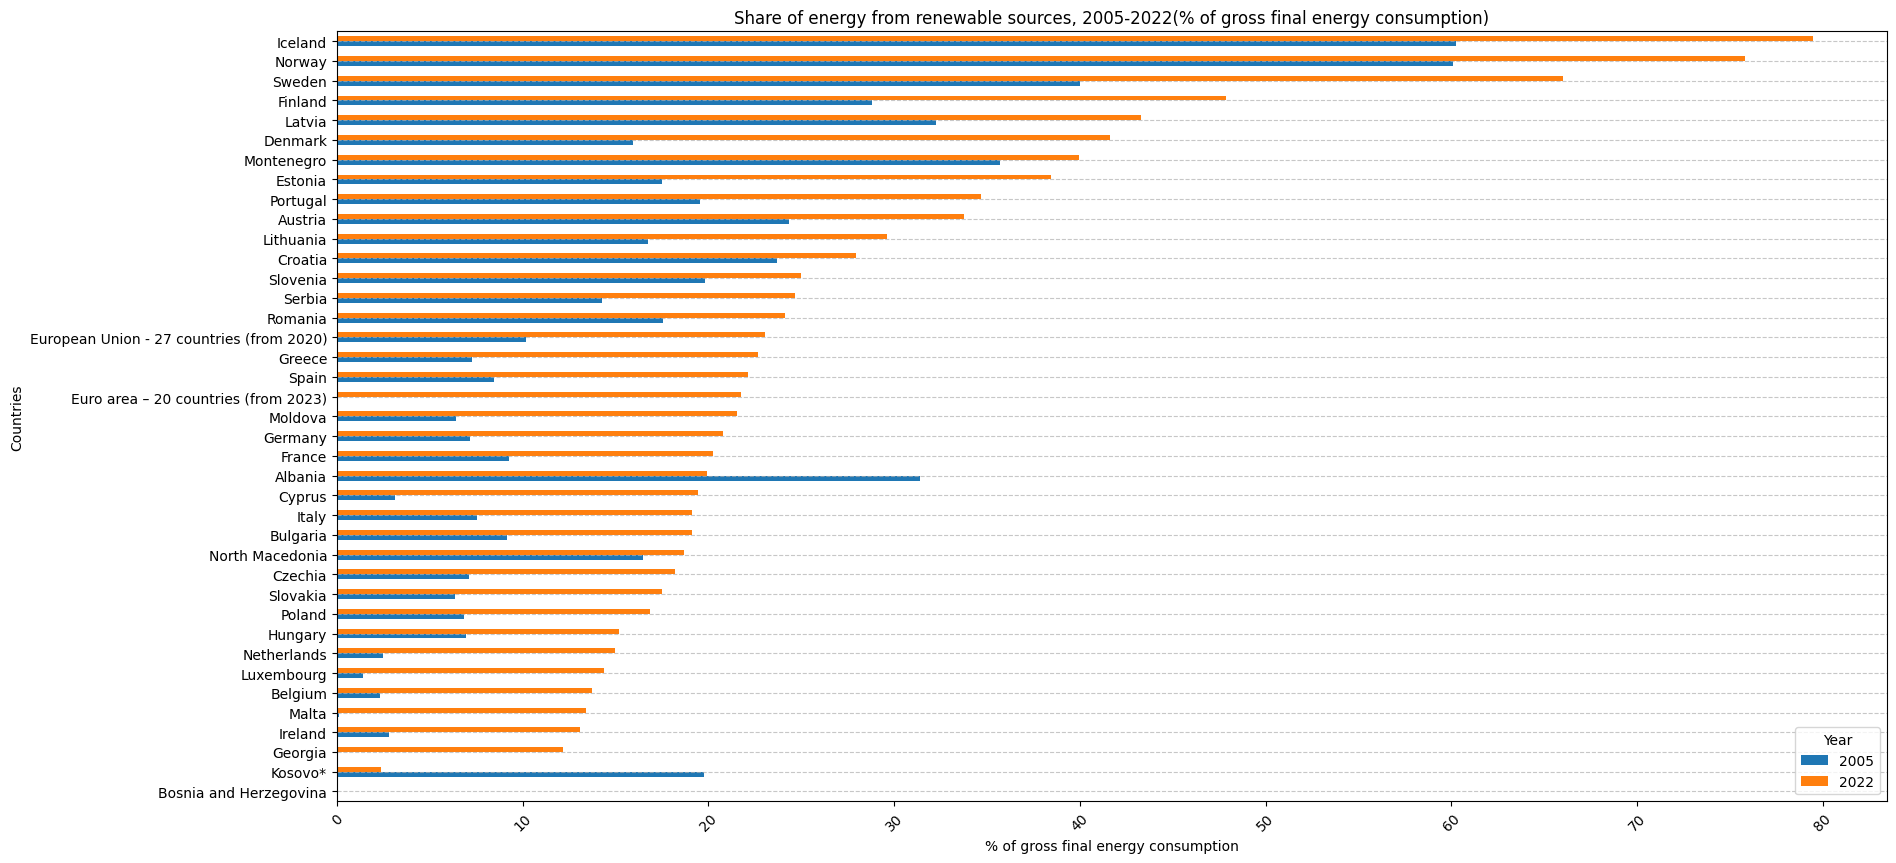

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = '/content/eu_renewable_energy_2005_2022.csv'
eu_energy_df = pd.read_csv(csv_file)

#setting index by country
eu_energy_df = eu_energy_df.replace(':', 0, regex = True)
# years = eu_energy_df.columns.tolist()

countries = eu_energy_df['country_name'].tolist()
#eu_energy_df = eu_energy_df.set_index('TIME')
countries
eu_energy_df['2015'].tolist()

data_dict = {}

#Ciclo per scegliere piu d date diverse da visualizzare
# chosen_year_index = 0
# for year in range(2006,2023):
#     if(chosen_year_index % 4 == 0):
#         data_dict[str(year)] = eu_energy_df[str(year)].astype(float).tolist()
#     chosen_year_index += 1


data_dict['2005'] = eu_energy_df['2005'].astype(float).tolist()
data_dict['2022'] = eu_energy_df['2022'].astype(float).tolist()


eu_energy_df = pd.DataFrame(data_dict, index=countries)

eu_energy_df = eu_energy_df.sort_values(by='2022', ascending=True)

# Create the bar plot

eu_energy_df.plot.barh(figsize=(20, 10))
plt.title('Share of energy from renewable sources, 2005-2022(% of gross final energy consumption)')
plt.ylabel('Countries')
plt.xlabel('% of gross final energy consumption')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()



#Classifica con variazione


PUE -> Power usage efficiency rapporto tra energia fruita dai server rispetto al totale che metto dentro ai server per fargli fuzionare

Omeostasi 24°C, 700w devo usare quelli per alimentare server e togliere stessa misura di calore per tenerli funzionanti, se invece sono in zone molto fredde, risulta vantaggioso

Idea

Rigassificazione genera freddo, si potrebbe mettere data center


Ravenna -> Generazione di energia da fonti rinnovabili, Agnes, (Rif. Bernadini) off-shore, grande diametro delle pale supplisce al vento forte, fotovoltaico marittimo(girevoli), idrogeno tramite elettrolisi


In [3]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 7.4 MB/s eta 0:00:00


In [4]:
import emoji

#creare due df con indici e vedere la differenza
eu_energy_2005_df = eu_energy_df['2005'].sort_values(ascending=False).reset_index()
eu_energy_2005_df['Rank'] = eu_energy_2005_df.index + 1
eu_energy_2005_df.index = eu_energy_2005_df.index + 1
eu_energy_2005_df = eu_energy_2005_df.rename(columns={'index': 'Country', '2005': '% Share of Energy from renewable sources 2005'})


eu_energy_2022_df = eu_energy_df['2022'].sort_values(ascending=False).reset_index()
eu_energy_2022_df['Rank'] = eu_energy_2022_df.index + 1
eu_energy_2022_df.index = eu_energy_2022_df.index + 1
eu_energy_2022_df = eu_energy_2022_df.rename(columns={'index': 'Country', '2022': '% Share of Energy from renewable sources 2022'})


ranking_variation = []
#list of all countries
for country in eu_energy_2022_df['Country']:
    ranking_variation.append(eu_energy_2005_df[eu_energy_2005_df['Country'] == country]['Rank'].tolist()[0] - eu_energy_2022_df[eu_energy_2022_df['Country'] == country]['Rank'].tolist()[0] )


def higlight_rank_fun(x):
    if x > 0:
        return emoji.emojize(f':up_arrow: +{x}')
    elif x == 0:
        return emoji.emojize(f':ON!_arrow:{x}')
    else:
        return emoji.emojize(f':down_arrow: {x}')

eu_energy_2022_df['Ranking Variation'] = ranking_variation
eu_energy_2005_2022_df = pd.concat([eu_energy_2005_df, eu_energy_2022_df], axis=1)
eu_energy_2005_2022_df['Ranking Variation'] = eu_energy_2005_2022_df['Ranking Variation'].apply(higlight_rank_fun)
display(eu_energy_2005_2022_df)

#TODO cancella la df di sinistra che



,Country,% Share of Energy from renewable sources 2005,Rank,Country,% Share of Energy from renewable sources 2022,Rank,Ranking Variation
1,Iceland,60.270,1,Iceland,79.475,1,🔛0
2,Norway,60.069,2,Norway,75.820,2,🔛0
3,Sweden,39.982,3,Sweden,66.002,3,🔛0
4,Montenegro,35.694,4,Finland,47.886,4,⬆️ +3
5,Latvia,32.264,5,Latvia,43.316,5,🔛0
6,Albania,31.367,6,Denmark,41.602,6,⬆️ +11
7,Finland,28.814,7,Montenegro,39.944,7,⬇️ -3
8,Austria,24.353,8,Estonia,38.472,8,⬆️ +6
9,Croatia,23.691,9,Portugal,34.677,9,⬆️ +3
10,Slovenia,19.809,10,Austria,33.758,10,⬇️ -2


#Situazione Islanda
Evoluzione dell'uso di energia primaria da quali fonti provengono
Iceland 1940-2020
Data url: https://orkustofnun.is/en/information/numerical_data/energy
Valori espressi in PJ(Peta joule) = 277.7GWh

Tenendo sempre conto del fabbisogno di elettricità di una famiglia di 4 persone stimato da ARERA, è possibile calcolare un consumo elettrico medio di 225 kWh al mese

1GWh = 1 000 000 kWh

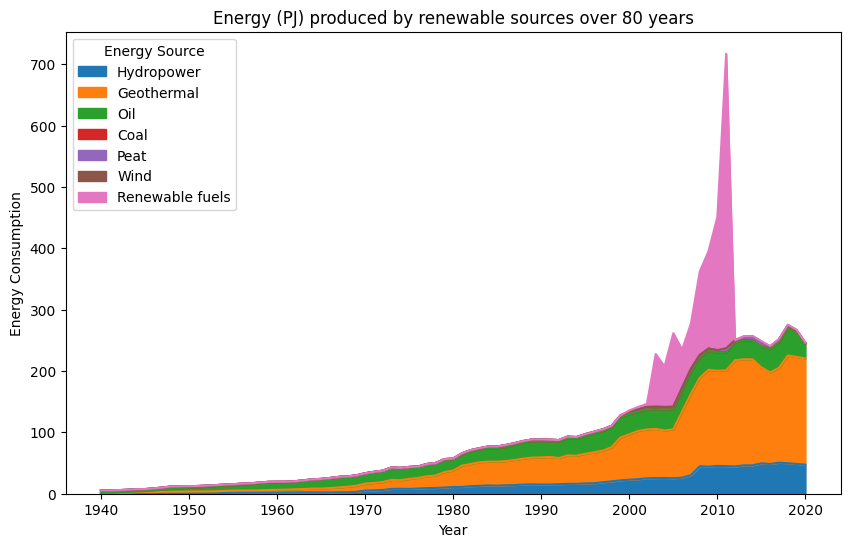

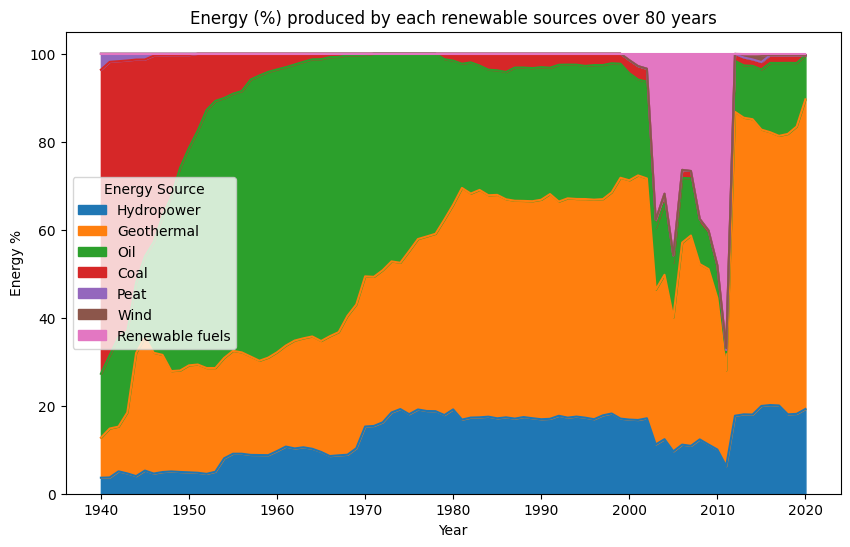

In [ ]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
# data = {'Year': [2022, 2022, 2022, 2023],
#         'Category': ['A', 'B', 'A', 'A'],
#         'Value': [100, 50, 80, 120]}

csv_file = '/content/Iceland_1940_2020_trunc.csv'
iceland_energy_df = pd.read_csv(csv_file, index_col='Year')

iceland_energy_df = iceland_energy_df.fillna(0)
iceland_energy_df = iceland_energy_df.replace(',', '.', regex = True)
iceland_energy_df = iceland_energy_df.astype(float)

iceland_energy_df.plot(kind='area', stacked=True, figsize=(10, 6))

#Grafico per valori assoluti
plt.title('Energy (PJ) produced by renewable sources over 80 years')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.legend(title='Energy Source')

plt.show()

#Magari percentualizzati ci fa capire meglio evoluzione del mix energetico
iceland_energy_df

iceland_energy_df['Total'] = iceland_energy_df[['Hydropower', 'Geothermal', 'Oil',"Coal", "Peat", "Wind", "Renewable fuels"]].sum(axis=1)
# Calculate percentages for each category
iceland_energy_PCT_df = iceland_energy_df.div(iceland_energy_df['Total'], axis=0) * 100
iceland_energy_PCT_df = iceland_energy_PCT_df.drop('Total', axis=1)

iceland_energy_PCT_df.plot(kind='area', stacked=True, figsize=(10, 6))

#Grafico per valori assoluti
plt.title('Energy (%) produced by each renewable sources over 80 years')
plt.xlabel('Year')
plt.ylabel('Energy %')
plt.legend(title='Energy Source')

plt.show()

#iceland_energy_df.groupby('Year').sum()
# year_list = iceland_energy_df['Year'].tolist()

#fig = px.area(iceland_energy_df, x='Year',  y=[col for col in iceland_energy_df.columns if col != 'Year' and col != 'Total PJ' and col != 'Renewables %'])
#fig.show()


Mistero 2000-2010 Renewable Fuels --> Endurnýjanleg eldsneyti
 https://is.wikipedia.org/wiki/Endurn%C3%BDjanleg_eldsneyti

 Possibile sperimentazione di Hidrogeno e Metano(Da indagare di più)

#Situazione Italiana
URL: https://www.terna.it/it/sistema-elettrico/statistiche/evoluzione-mercato-elettrico


In [ ]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt


# Sample data
# data = {'Year': [2022, 2022, 2022, 2023],
#         'Category': ['A', 'B', 'A', 'A'],
#         'Value': [100, 50, 80, 120]}

csv_file = '/content/Italia_2000_2022.csv'
italia_energy_df = pd.read_csv(csv_file)
fig = px.area(italia_energy_df, x='Anno', y='Produzione (GWh) corretta', color='Tipo impianto corretto', title='Energy Consumption Over Years')
fig.show()

#Tredozio vulcano ER



#Obiettivi UE
Key objectives:
- 23% share of renewables in EU energy consumption 2022
- 32% 2030 target set in 2018
- at least 42.5% new binding target for 2030, but aiming for 45%

URL: https://energy.ec.europa.eu/topics/renewable-energy/renewable-energy-directive-targets-and-rules/renewable-energy-targets_en

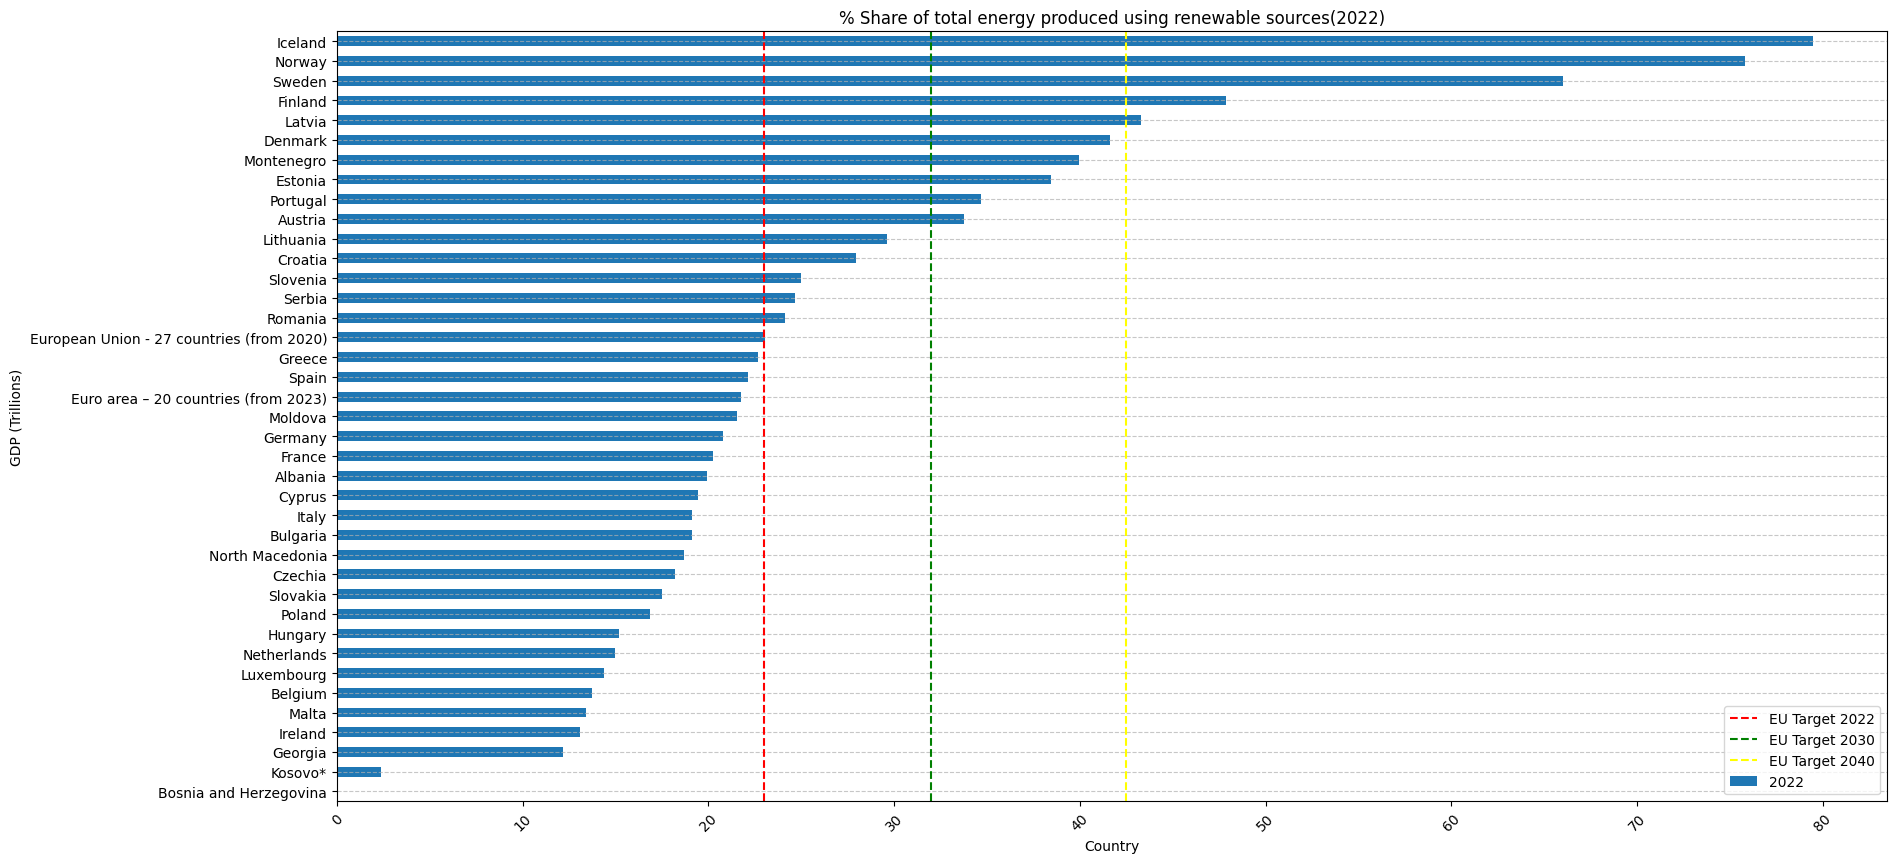

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = '/content/eu_renewable_energy_2005_2022.csv'
eu_energy_df = pd.read_csv(csv_file)

#setting index by country
eu_energy_df = eu_energy_df.replace(':', 0, regex = True)
countries = eu_energy_df['country_name'].tolist()

data_dict = {}
data_dict['2022'] = eu_energy_df['2022'].astype(float).tolist()


eu_energy_df = pd.DataFrame(data_dict, index=countries)

eu_energy_df = eu_energy_df.sort_values(by='2022', ascending=True)

# Create the bar plot

eu_energy_df.plot.barh(figsize=(20, 10))
ax = plt.gca()
plt.title('% Share of total energy produced using renewable sources(2022)')
plt.ylabel('GDP (Trillions)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.axvline(x=23, color='red', linestyle='--', label='EU Target 2022')
plt.axvline(x=32, color='green', linestyle='--', label='EU Target 2030')
plt.axvline(x=42.5, color='yellow', linestyle='--', label='EU Target 2040')
plt.legend()
plt.show()



#Esempio correlazione con dati mock


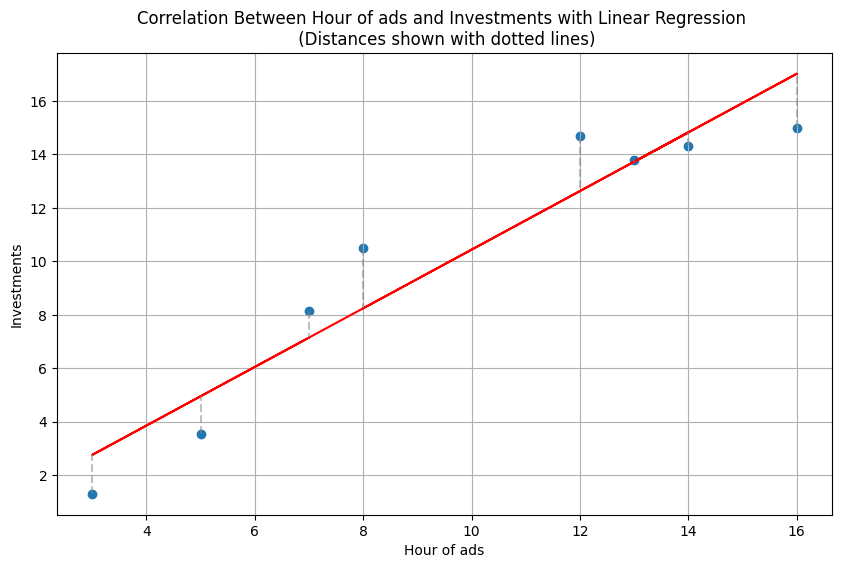

Pearson correlation coefficient: 0.95199012321881
Strong correlation


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# Sample data (Coffee price vs Milk price)
hour_ads = [8, 12, 16, 13, 14, 3, 5, 7]  #ore al giorno di pubblicita sensibilizzazione alle energie rinnovabili
investments = [10.5, 14.7, 15, 13.8, 14.3, 1.3, 3.53, 8.13]  # Investimeni in termini di Mln Euro

# Calculate linear regression
m, b = np.polyfit(hour_ads, investments, 1)  # Linear regression to find slope (m) and y-intercept (b)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(hour_ads, investments)

# Add regression line
# y = mx + q
regression_line = m * np.array(hour_ads) + b
plt.plot(hour_ads, regression_line, color='red')

# Calculate distances between each point and the regression line
distances = np.abs(m * np.array(hour_ads) + b - investments)

# Add dotted lines from each point to the regression line
for i, (x, y) in enumerate(zip(hour_ads, investments)):
  distance_y = m * x + b - y  # Calculate y-offset for the dotted line
  dotted_line_y = [y, y + distance_y]  # Create y-coordinates for the dotted line
  plt.plot([x, x], dotted_line_y, color='gray', linestyle='--', alpha=0.5)  # Plot the dotted line

# Set labels and title
plt.xlabel("Hour of ads")
plt.ylabel("Investments")
title = "Correlation Between Hour of ads and Investments with Linear Regression \n (Distances shown with dotted lines)"
plt.title(title)

# Display the plot
plt.grid(True)
plt.show()

#Esempio usando pearson correlation coeff
# Sample data
# The Pearson correlation coefficient measures linear relationships.
# A value closer to 1 or -1 indicates a stronger correlation.
# A value closer to 0 indicates a weaker or no correlation.
# The p-value helps assess the statistical significance of the correlation.
x = hour_ads
y = investments

# Create a matrix with the data
data = scipy.stats.linregress(x, y)

# Extract Pearson correlation coefficient R
# R² coefficient of determination
corr = data.rvalue
print("Pearson correlation coefficient:", corr)

if(corr < -0.5 or corr > 0.5):
  print("Strong correlation")
elif(corr < -0.3 or corr > 0.3):
  print("Moderate correlation")
elif(corr < -0.2 or corr > 0.2):
  print("Low correlation")
else:
  print("No correlation")
